# Airline Passenger Satisfication Prediction

### Importing Required Libraries

In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [552]:
# Airline dataset loaded
airline_dataset = pd.read_csv('Airline_Passenger_Satisfaction.csv')

In [553]:
# Getting 15000 random sample data to process
airline_dataset = airline_dataset.sample(n=15000)

In [554]:
# Getting the shape
airline_dataset.shape

(15000, 25)

In [556]:
# Getting first 10 rows
airline_dataset.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
35485,35485,122433,Male,disloyal Customer,22,Business travel,Eco,416,5,0,...,1,1,2,2,2,4,1,0,0.0,satisfied
45861,45861,104009,Female,Loyal Customer,33,Personal Travel,Eco,1334,5,5,...,5,3,3,5,5,4,5,5,4.0,satisfied
22917,22917,22422,Female,Loyal Customer,38,Personal Travel,Eco,83,5,4,...,3,5,1,1,2,1,3,39,69.0,satisfied
7427,7427,50586,Male,Loyal Customer,64,Personal Travel,Eco,86,3,4,...,2,3,4,4,5,4,2,0,0.0,neutral or dissatisfied
45988,45988,90102,Female,Loyal Customer,22,Business travel,Eco,1145,4,1,...,4,3,2,3,4,4,4,75,69.0,neutral or dissatisfied
48260,48260,83295,Male,Loyal Customer,26,Personal Travel,Eco,1979,3,4,...,3,2,2,2,3,2,3,43,30.0,neutral or dissatisfied
84911,84911,21984,Male,Loyal Customer,12,Personal Travel,Eco,448,2,4,...,4,4,4,5,2,3,2,136,147.0,neutral or dissatisfied
96005,96005,85205,Female,Loyal Customer,45,Business travel,Business,3607,2,2,...,3,3,3,3,4,3,4,0,0.0,satisfied
85867,85867,42497,Male,disloyal Customer,38,Business travel,Eco,495,1,3,...,3,3,5,1,2,4,3,0,0.0,neutral or dissatisfied
40154,40154,25568,Female,Loyal Customer,31,Business travel,Business,3040,2,2,...,2,4,1,2,4,3,2,27,42.0,satisfied


In [557]:
# Getting last 10 rows
airline_dataset.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
4192,4192,40243,Female,Loyal Customer,34,Business travel,Business,2698,4,4,...,5,5,5,5,1,5,1,0,0.0,satisfied
25275,25275,128135,Male,disloyal Customer,25,Business travel,Eco,1026,3,3,...,3,5,4,4,3,4,3,0,0.0,neutral or dissatisfied
43629,43629,6680,Male,disloyal Customer,19,Business travel,Eco,258,0,5,...,4,4,5,5,3,4,4,0,0.0,satisfied
71156,71156,86742,Male,Loyal Customer,42,Business travel,Business,2641,5,5,...,3,3,3,3,4,3,5,20,0.0,satisfied
46548,46548,67902,Female,Loyal Customer,7,Personal Travel,Eco,1188,4,4,...,1,4,2,4,5,4,1,0,0.0,satisfied
88443,88443,41853,Female,disloyal Customer,25,Business travel,Eco,483,2,5,...,2,4,1,1,3,3,2,0,26.0,neutral or dissatisfied
38008,38008,24181,Male,disloyal Customer,30,Business travel,Eco,302,2,5,...,4,5,2,1,3,2,4,0,0.0,neutral or dissatisfied
46698,46698,73182,Male,disloyal Customer,35,Business travel,Business,1258,3,3,...,3,3,5,4,5,4,3,0,0.0,neutral or dissatisfied
54797,54797,38766,Female,Loyal Customer,29,Business travel,Business,1713,1,1,...,5,2,5,5,5,5,5,4,8.0,satisfied
84875,84875,99112,Male,Loyal Customer,67,Personal Travel,Eco,181,3,2,...,2,3,2,3,2,4,2,0,0.0,neutral or dissatisfied


In [558]:
# Getting all the data types
airline_dataset.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [559]:
# Display the summarry of the dataset
airline_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 35485 to 84875
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         15000 non-null  int64  
 1   id                                 15000 non-null  int64  
 2   Gender                             15000 non-null  object 
 3   Customer Type                      15000 non-null  object 
 4   Age                                15000 non-null  int64  
 5   Type of Travel                     15000 non-null  object 
 6   Class                              15000 non-null  object 
 7   Flight Distance                    15000 non-null  int64  
 8   Inflight wifi service              15000 non-null  int64  
 9   Departure/Arrival time convenient  15000 non-null  int64  
 10  Ease of Online booking             15000 non-null  int64  
 11  Gate location                      15000 non-null 

In [560]:
# Examine the dataset for null values.
airline_dataset.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             34
satisfaction                          0


In [561]:
# Droping the rows null data 
airline_dataset.dropna(inplace=True)

In [562]:
# Verifing whether the null data are droped
airline_dataset.shape

(14966, 25)

### Analyzing Data

In [563]:
# Getting the measuers
airline_dataset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000,14966.000000
mean,51505.669317,65164.349860,39.603902,1204.648804,2.718094,3.052118,2.745156,2.971803,3.193238,3.253508,3.446679,3.361085,3.378926,3.348457,3.633302,3.297942,3.638581,3.281438,14.795202,15.175264
std,29925.535373,37349.767808,15.033363,1004.280997,1.320623,1.519125,1.390724,1.279359,1.336255,1.339128,1.316095,1.334892,1.287066,1.315862,1.177571,1.268037,1.172524,1.320748,38.184656,38.771074
min,16.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,25652.500000,32612.250000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,51318.000000,65099.000000,40.000000,853.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77210.750000,97704.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,103898.000000,129865.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,978.000000,970.000000


### Data Preprocessing

In [564]:
# Removing unwanted columns 
airline_dataset=airline_dataset.drop(['id','Unnamed: 0','Customer Type','Gate location','Type of Travel',], axis=1)

In [565]:
#View count of cells with object data type
for x in airline_dataset.select_dtypes(include = 'object'):
    print(airline_dataset[x].value_counts())

Female    7650
Male      7316
Name: Gender, dtype: int64
Business    7160
Eco         6723
Eco Plus    1083
Name: Class, dtype: int64
neutral or dissatisfied    8486
satisfied                  6480
Name: satisfaction, dtype: int64


### Encoding Categorical Data

In [566]:
# Catrgorizing some columns
refactored_values = {
  'Gender': {
    'Male': 0,
    'Female': 1
  },
  'satisfaction': {
    'neutral or dissatisfied': 0,
    'satisfied': 1 
  },
  'Class': {
    'Business': 0,
    'Eco': 1 ,
    'Eco Plus':2
  }
}

airline_dataset.replace(refactored_values, inplace=True)

In [567]:
# Rechecking the categorized Columns
airline_dataset.head()

,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
35485,0,22,1,416,5,0,4,1,4,1,1,1,2,2,2,4,1,0,0.0,1
45861,1,33,1,1334,5,5,5,5,5,3,5,3,3,5,5,4,5,5,4.0,1
22917,1,38,1,83,5,4,5,3,5,3,3,5,1,1,2,1,3,39,69.0,1
7427,0,64,1,86,3,4,3,2,3,2,2,3,4,4,5,4,2,0,0.0,0
45988,1,22,1,1145,4,1,1,4,4,3,4,3,2,3,4,4,4,75,69.0,0


In [568]:
airline_dataset.tail()

,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
88443,1,25,1,483,2,5,2,2,2,2,2,4,1,1,3,3,2,0,26.0,0
38008,0,30,1,302,2,5,2,4,2,4,4,5,2,1,3,2,4,0,0.0,0
46698,0,35,0,1258,3,3,3,3,3,3,3,3,5,4,5,4,3,0,0.0,0
54797,1,29,0,1713,1,1,1,5,5,5,5,2,5,5,5,5,5,4,8.0,1
84875,0,67,1,181,3,2,0,2,0,2,2,3,2,3,2,4,2,0,0.0,0


### Visualizing the Data

In [569]:
# Getting the distribution of Age, class, Seat comfort, ease of Online booking, on-board service, cleanliness
sns.set_style('darkgrid')

# createing a 3X2 subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(150, 100))  

sns.histplot(ax=axs[0, 0], data=airline_dataset, x='Age', kde=True)  
sns.histplot(ax=axs[0, 1], data=airline_dataset, x='Class', kde=True)  
sns.histplot(ax=axs[1, 0], data=airline_dataset, x='Seat comfort', kde=True) 
sns.histplot(ax=axs[1, 1], data=airline_dataset, x='Ease of Online booking', kde=True)  
sns.histplot(ax=axs[2, 0], data=airline_dataset, x='On-board service', kde=True) 
sns.histplot(ax=axs[2, 1], data=airline_dataset, x='Cleanliness', kde=True) 

# Adding title
fig.suptitle('Histograms of Airline Ratings', fontsize=120) 

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Satification vs Cleanliness '}, xlabel='Cleanliness', ylabel='satisfaction'>

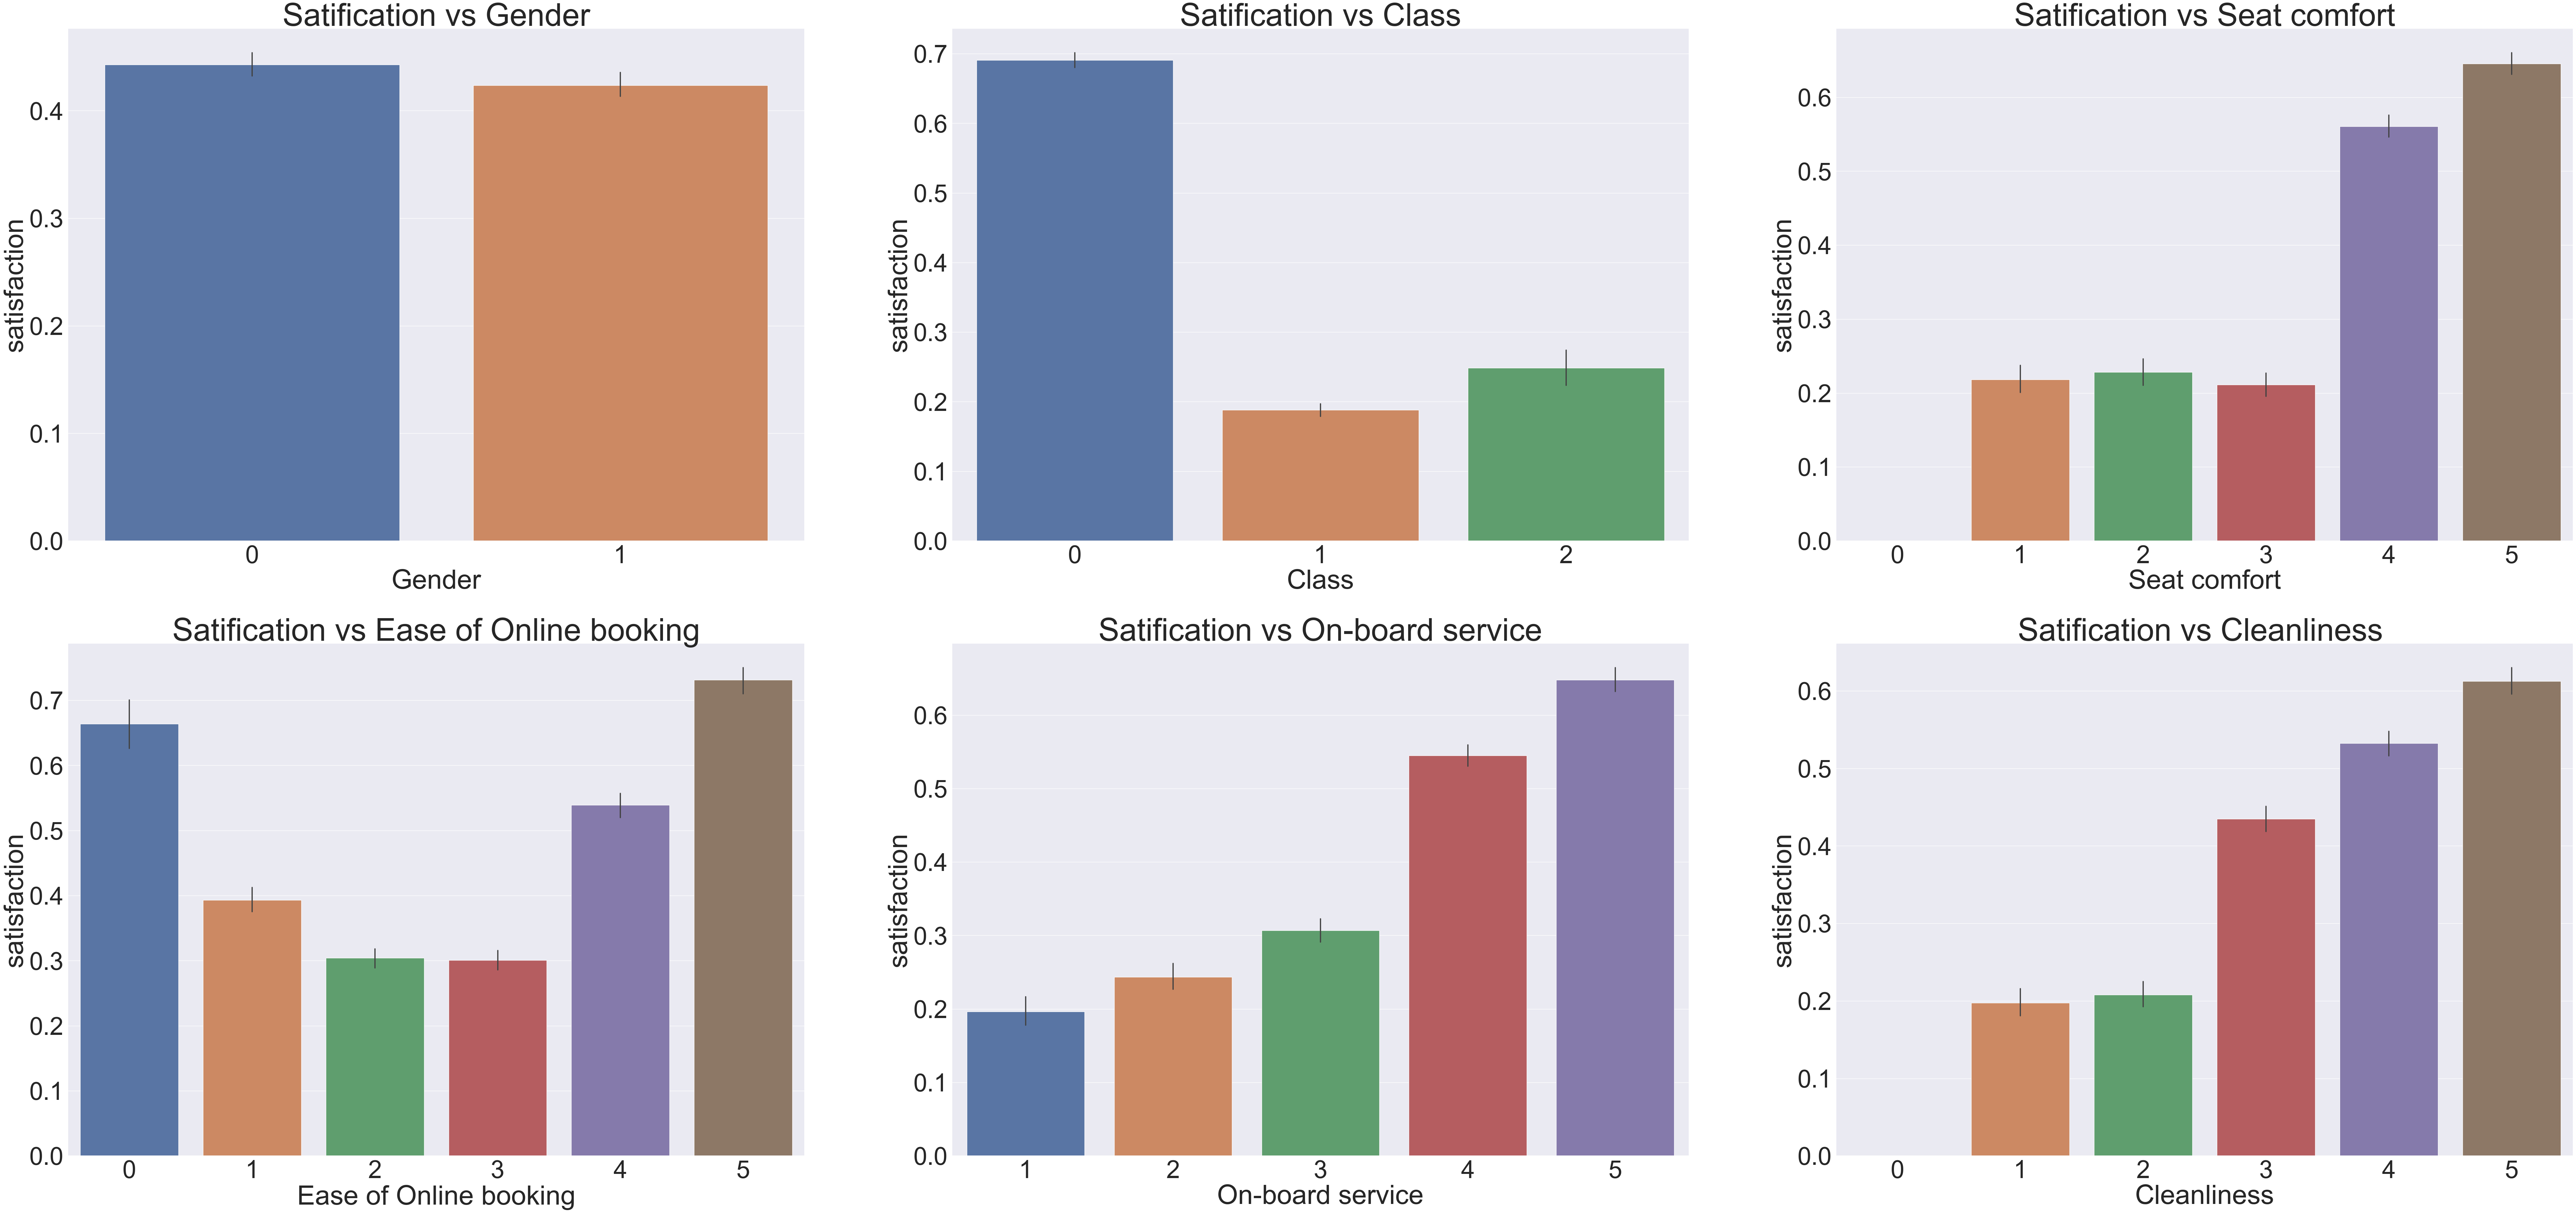

In [570]:
#Barchart Visualizing
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Satification vs Gender",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Gender', data = airline_dataset)

plt.subplot(332)
plt.title("Satification vs Class",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Class',data = airline_dataset)

plt.subplot(333)
plt.title("Satification vs Seat comfort",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Seat comfort',data = airline_dataset)

plt.subplot(334)
plt.title("Satification vs Ease of Online booking",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Ease of Online booking',data = airline_dataset)

plt.subplot(335)
plt.title("Satification vs On-board service",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'On-board service',data = airline_dataset)

plt.subplot(336)
plt.title("Satification vs Cleanliness ",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Cleanliness',data = airline_dataset)
            

In [571]:
# Age vs satisfaction
airline_dataset[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
51,58,0.622047
41,48,0.609610
46,53,0.597173
47,54,0.596774
44,51,0.596091
...,...,...
62,69,0.120000
3,10,0.114943
7,14,0.105769
2,9,0.085714


In [572]:
# Gender vs satisfaction
airline_dataset[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

# 0 -> Male
# 1 -> Female

,Gender,satisfaction
0,0,0.442728
1,1,0.423660


### Training the model 

In [573]:
#Splitting featuers and target
x = airline_dataset.drop(columns = 'satisfaction', axis = 1)
y = airline_dataset['satisfaction']

In [574]:
print(y)

35485    1
45861    1
22917    1
7427     0
45988    0
        ..
88443    0
38008    0
46698    0
54797    1
84875    0
Name: satisfaction, Length: 14966, dtype: int64


In [575]:
print(x)

       Gender  Age  Class  Flight Distance  Inflight wifi service  \
35485       0   22      1              416                      5   
45861       1   33      1             1334                      5   
22917       1   38      1               83                      5   
7427        0   64      1               86                      3   
45988       1   22      1             1145                      4   
...       ...  ...    ...              ...                    ...   
88443       1   25      1              483                      2   
38008       0   30      1              302                      2   
46698       0   35      0             1258                      3   
54797       1   29      0             1713                      1   
84875       0   67      1              181                      3   

       Departure/Arrival time convenient  Ease of Online booking  \
35485                                  0                       4   
45861                              

In [576]:
#Scaling data
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)
print(x)

[[-1.02257194 -1.1710281   0.65364945 ... -1.72744068 -0.38747754
  -0.39141992]
 [ 0.97792631 -0.43929777  0.65364945 ...  1.30124691 -0.25653052
  -0.28824678]
 [ 0.97792631 -0.10669308  0.65364945 ... -0.21309689  0.63390923
   1.38831681]
 ...
 [-1.02257194 -0.30625589 -0.95611156 ... -0.21309689 -0.38747754
  -0.39141992]
 [ 0.97792631 -0.70538153 -0.95611156 ...  1.30124691 -0.28271992
  -0.18507363]
 [-1.02257194  1.82241414  0.65364945 ... -0.97026879 -0.38747754
  -0.39141992]]


In [577]:
# dividing the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

In [578]:
print(x.shape, x_train.shape, x_test.shape)

(14966, 19) (11224, 19) (3742, 19)


In [579]:
print(y.shape,y_train.shape,y_test.shape)

(14966,) (11224,) (3742,)


In [580]:
#Preparing dataframe to print the models and their respecrive accuracy
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])

## Random Forest 

In [581]:
# Create a model using RandomForestClassifier
model = RandomForestClassifier()

In [582]:
# Utilize a training set to train model.
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [583]:
# Utilizing testing set to test model
accuracy = model.score(x_test, y_test)
print('Random Forest Classifier')
print(f'Model accuracy\t\t: {accuracy}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(accuracy)}')
print(classification_report(y_test, y_pred))

Random Forest Classifier
Model accuracy		: 0.9363976483164084
Accuracy in Percentage	: 93.6%
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2125
           1       0.94      0.91      0.92      1617

    accuracy                           0.94      3742
   macro avg       0.94      0.93      0.93      3742
weighted avg       0.94      0.94      0.94      3742



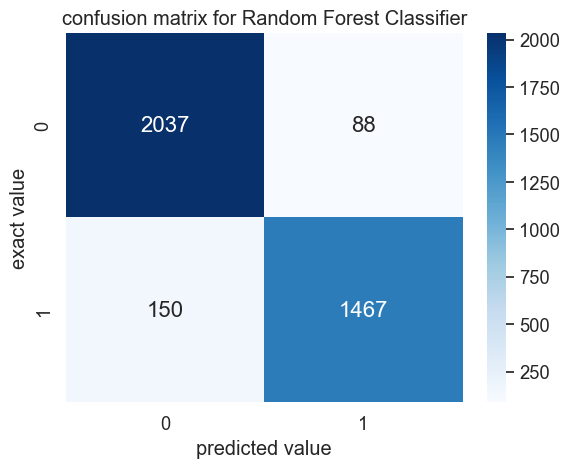

In [584]:
# confusion matrix for random forest
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for Random Forest Classifier')

plt.show()

## Logestic Regression

In [585]:
#Create a model using LogisticRegression
LRmodel = LogisticRegression()

In [586]:
# Utilize a training set to train model
LRmodel.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [587]:
# Utilizing testing set to test the model
acc = LRmodel.score(x_test, y_test)
print('Logistic Regression scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

Logistic Regression scores
Model accuracy		: 0.8580972741849279
Accuracy in Percentage	: 85.8%
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2125
           1       0.94      0.91      0.92      1617

    accuracy                           0.94      3742
   macro avg       0.94      0.93      0.93      3742
weighted avg       0.94      0.94      0.94      3742



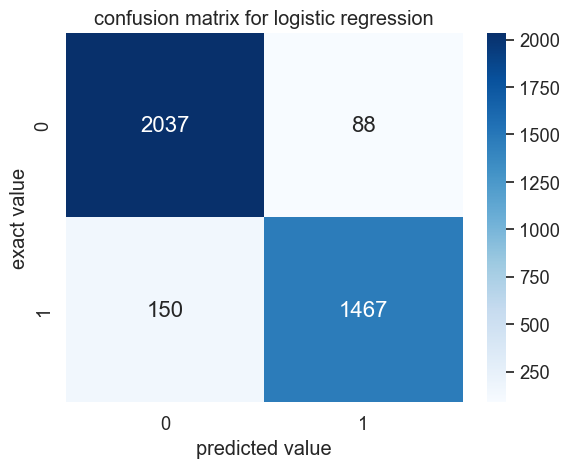

In [588]:
# confusion matrix for logistic regression
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

# Add labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for logistic regression')

plt.show()

## SVC

In [589]:
# Create a model using SVC classifier
model = SVC()

In [590]:
# Utilize a training set to train the model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [591]:
# Utilizing testing set to test model
acc = model.score(x_test, y_test)
#y_pred = model.predict(x_test)

print('SVC Classifier scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

SVC Classifier scores
Model accuracy		: 0.927578834847675
Accuracy in Percentage	: 92.8%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2125
           1       0.93      0.90      0.92      1617

    accuracy                           0.93      3742
   macro avg       0.93      0.92      0.93      3742
weighted avg       0.93      0.93      0.93      3742



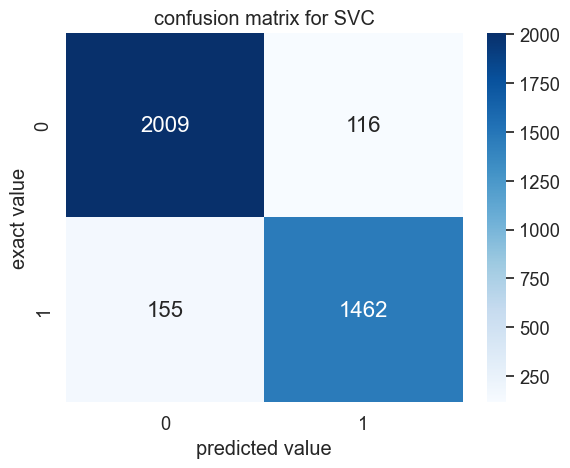

In [592]:
# confusion matrix for SVC
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

# Add labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for SVC')

plt.show()

## Decision Tree 

In [593]:
#Create a model using DecisionTree
model = DecisionTreeClassifier()

In [594]:
# Utilize a training set to train model
model.fit(x_train, y_train)
y_pred = DTmodel.predict(x_test)

In [595]:
# Utilizing testing set to test the model
acc = model.score(x_test, y_test)

print('Decision Tree Classifier scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

Decision Tree Classifier scores
Model accuracy		: 0.9094067343666489
Accuracy in Percentage	: 90.9%
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2125
           1       0.89      0.89      0.89      1617

    accuracy                           0.90      3742
   macro avg       0.90      0.90      0.90      3742
weighted avg       0.90      0.90      0.90      3742



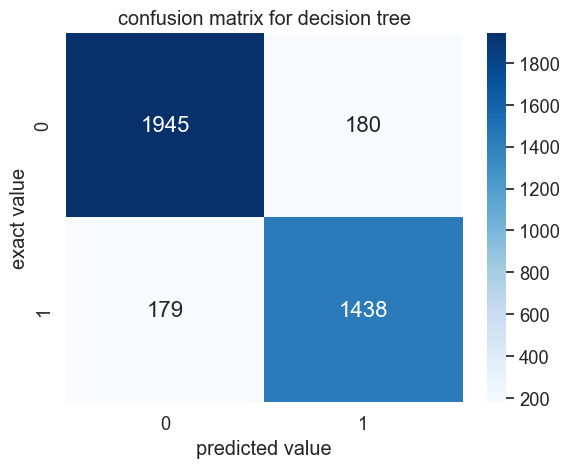

In [596]:
# confusion matrix for decision tree
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

# Add labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for decision tree')

plt.show()

## Predictions on a Single Input

In [597]:
# Building a predictive system
# get the input values
input_data = (1,50,0,2643,4,4,4,4,4,4,5,5,5,5,4,5,5,0,0.0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = LRmodel.predict(input_data_reshape)
if prediction == 1:
    print('Passenger satisfied!!!')
else:
    print('Passenger Neutral or Dissatisfied')

Passenger satisfied!!!
